In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

import joblib


In [2]:
df = pd.read_csv(r"D:\ad_sales_ml\data\sales_ads_1000.csv")
df.head()


,price,discount,ad_spend,targeting,creative,page_quality,region,sales
0,3000,5,23491,medium,urgency,4,low,1078
1,3500,10,4341,medium,normal,3,low,694
2,2000,0,14855,medium,offer,2,high,1563
3,3000,0,3338,medium,normal,3,low,739
4,3000,0,8895,high,offer,3,low,1056


In [3]:
df.shape


(1000, 8)

In [4]:
df.isnull().sum()


price           0
discount        0
ad_spend        0
targeting       0
creative        0
page_quality    0
region          0
sales           0
dtype: int64

In [5]:
df_encoded = pd.get_dummies(
    df,
    columns=["targeting", "creative", "region"],
    drop_first=True
)

df_encoded.head()


,price,discount,ad_spend,page_quality,sales,targeting_low,targeting_medium,creative_offer,creative_urgency,region_low
0,3000,5,23491,4,1078,False,True,False,True,True
1,3500,10,4341,3,694,False,True,False,False,True
2,2000,0,14855,2,1563,False,True,True,False,False
3,3000,0,3338,3,739,False,True,False,False,True
4,3000,0,8895,3,1056,False,False,True,False,True


In [6]:
X = df_encoded.drop("sales", axis=1)
y = df_encoded["sales"]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 59.05227500000001


In [16]:
model = RandomForestRegressor(
    n_estimators=400,
    max_depth=15,        # KEY LINE
    min_samples_leaf=5,  # smooth predictions
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)


,n_estimators,400
,criterion,'squared_error'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 89.76775595442386


In [18]:
import pandas as pd

df = pd.read_csv(r"D:\ad_sales_ml\data\sales_ads_1000.csv")


In [19]:
df.shape
df.head()


,price,discount,ad_spend,targeting,creative,page_quality,region,sales
0,3000,5,23491,medium,urgency,4,low,1078
1,3500,10,4341,medium,normal,3,low,694
2,2000,0,14855,medium,offer,2,high,1563
3,3000,0,3338,medium,normal,3,low,739
4,3000,0,8895,high,offer,3,low,1056


In [20]:
df_encoded = pd.get_dummies(
    df,
    columns=["targeting", "creative", "region"],
    drop_first=True
)


In [21]:
X = df_encoded.drop("sales", axis=1)
y = df_encoded["sales"]


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

baseline_model = RandomForestRegressor(
    random_state=42
)

baseline_model.fit(X_train, y_train)

baseline_pred = baseline_model.predict(X_test)
baseline_mae = mean_absolute_error(y_test, baseline_pred)

print("Baseline MAE:", baseline_mae)


Baseline MAE: 60.2741


In [24]:
model = RandomForestRegressor(
    n_estimators=400,      # more trees = stability
    max_depth=15,          # controls overfitting
    min_samples_leaf=5,    # smooth predictions
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)


,n_estimators,400
,criterion,'squared_error'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Improved MAE:", mae)


Improved MAE: 89.76775595442388


In [26]:
df["sales"].describe()


count    1000.000000
mean     1234.115000
std       423.437822
min       448.000000
25%       932.000000
50%      1162.500000
75%      1438.000000
max      3046.000000
Name: sales, dtype: float64

In [27]:
mape = (abs(y_test - y_pred) / y_test).mean() * 100
print("MAPE:", mape)


MAPE: 7.23107159995587


In [28]:
import joblib

joblib.dump(model, r"D:\ad_sales_ml\model\model.pkl")


['D:\\ad_sales_ml\\model\\model.pkl']

In [29]:
loaded_model = joblib.load(r"D:\ad_sales_ml\model\model.pkl")

# quick test prediction
loaded_model.predict(X_test[:2])


array([1011.35113012, 1181.93807181])

In [1]:
import pandas as pd
import numpy as np
import joblib

model = joblib.load(r"D:\ad_sales_ml\model\model.pkl")


In [2]:
def predict_sales(input_df):
    return model.predict(input_df)


In [3]:
base_input = {
    "price": 3000,
    "discount": 5,
    "ad_spend": 10000,
    "page_quality": 4,
    "targeting_medium": 0,
    "targeting_high": 1,
    "creative_offer": 1,
    "creative_urgency": 0,
    "region_high": 1
}

base_df = pd.DataFrame([base_input])


In [4]:
base_sales = predict_sales(base_df)[0]
base_sales


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- region_high
- targeting_high
Feature names seen at fit time, yet now missing:
- region_low
- targeting_low


In [5]:
model.feature_names_in_


array(['price', 'discount', 'ad_spend', 'page_quality', 'targeting_low',
       'targeting_medium', 'creative_offer', 'creative_urgency',
       'region_low'], dtype=object)

In [6]:
base_input = {
    "price": 3000,
    "discount": 5,
    "ad_spend": 10000,
    "page_quality": 4,
    "targeting_low": 0,
    "targeting_medium": 0,   # both 0 → HIGH targeting
    "creative_offer": 1,
    "creative_urgency": 0,
    "region_low": 0          # 0 → HIGH demand region
}


In [7]:
import pandas as pd

base_df = pd.DataFrame([base_input])

# FORCE correct column order
base_df = base_df[model.feature_names_in_]

base_df


,price,discount,ad_spend,page_quality,targeting_low,targeting_medium,creative_offer,creative_urgency,region_low
0,3000,5,10000,4,0,0,1,0,0


In [8]:
base_sales = model.predict(base_df)[0]
base_sales


np.float64(1466.938911538044)

In [9]:
base_sales = model.predict(base_df)[0]
base_sales


np.float64(1466.9389115380443)

In [10]:
baseline_sales = model.predict(base_df)[0]
baseline_sales


np.float64(1466.9389115380452)

In [11]:
results = []

for spend in range(3000, 25001, 2000):
    temp = base_df.copy()
    temp["ad_spend"] = spend

    sales = model.predict(temp)[0]
    revenue = sales * temp["price"].values[0]
    profit = revenue - spend
    roi = profit / spend

    results.append([spend, sales, revenue, profit, roi])

what_if_df = pd.DataFrame(
    results,
    columns=["ad_spend", "sales", "revenue", "profit", "roi"]
)

what_if_df


,ad_spend,sales,revenue,profit,roi
0,3000,1473.420081,4.420260e+06,4.417260e+06,1472.420081
1,5000,1473.420081,4.420260e+06,4.415260e+06,883.052049
2,7000,1474.452533,4.423358e+06,4.416358e+06,630.908228
3,9000,1469.955319,4.409866e+06,4.400866e+06,488.985106
4,11000,1454.034161,4.362102e+06,4.351102e+06,395.554771
5,13000,1451.575616,4.354727e+06,4.341727e+06,333.978988
6,15000,1448.227890,4.344684e+06,4.329684e+06,288.645578
7,17000,1447.923312,4.343770e+06,4.326770e+06,254.515879
8,19000,1446.729553,4.340189e+06,4.321189e+06,227.430982
9,21000,1439.333539,4.318001e+06,4.297001e+06,204.619077


In [12]:
best_strategy = what_if_df.loc[what_if_df["roi"].idxmax()]
best_strategy


ad_spend    3.000000e+03
sales       1.473420e+03
revenue     4.420260e+06
profit      4.417260e+06
roi         1.472420e+03
Name: 0, dtype: float64

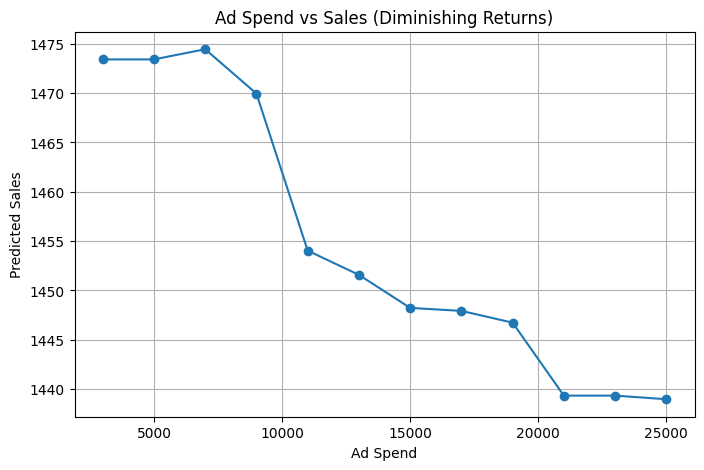

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(what_if_df["ad_spend"], what_if_df["sales"], marker="o")
plt.xlabel("Ad Spend")
plt.ylabel("Predicted Sales")
plt.title("Ad Spend vs Sales (Diminishing Returns)")
plt.grid(True)
plt.show()


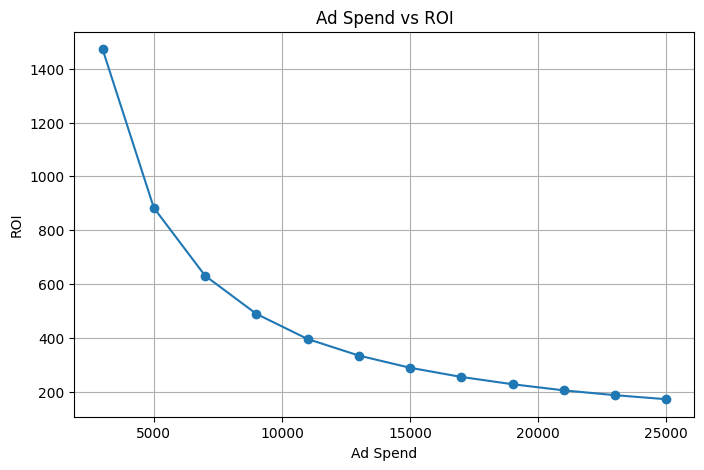

In [14]:
plt.figure(figsize=(8,5))
plt.plot(what_if_df["ad_spend"], what_if_df["roi"], marker="o")
plt.xlabel("Ad Spend")
plt.ylabel("ROI")
plt.title("Ad Spend vs ROI")
plt.grid(True)
plt.show()


In [15]:
base_input = {
    "price": 3000,
    "discount": 5,
    "ad_spend": 10000,
    "page_quality": 4,
    "targeting_low": 0,
    "targeting_medium": 0,   # HIGH targeting
    "creative_offer": 1,
    "creative_urgency": 0,
    "region_low": 0          # HIGH demand region
}

base_df = pd.DataFrame([base_input])
base_df = base_df[model.feature_names_in_]


In [16]:
ad_spend_values = [6000, 10000, 14000, 18000, 22000]
discount_values = [0, 5, 10]
page_quality_values = [3, 4, 5]


In [17]:
multi_results = []

for spend in ad_spend_values:
    for discount in discount_values:
        for quality in page_quality_values:
            temp = base_df.copy()
            temp["ad_spend"] = spend
            temp["discount"] = discount
            temp["page_quality"] = quality

            sales = model.predict(temp)[0]
            revenue = sales * temp["price"].values[0]
            profit = revenue - spend
            roi = profit / spend

            multi_results.append([
                spend, discount, quality, sales, revenue, profit, roi
            ])

multi_df = pd.DataFrame(
    multi_results,
    columns=[
        "ad_spend", "discount", "page_quality",
        "sales", "revenue", "profit", "roi"
    ]
)

multi_df.head()


,ad_spend,discount,page_quality,sales,revenue,profit,roi
0,6000,0,3,1381.390295,4.144171e+06,4.138171e+06,689.695147
1,6000,0,4,1454.991217,4.364974e+06,4.358974e+06,726.495609
2,6000,0,5,1559.736850,4.679211e+06,4.673211e+06,778.868425
3,6000,5,3,1394.302685,4.182908e+06,4.176908e+06,696.151342
4,6000,5,4,1473.336470,4.420009e+06,4.414009e+06,735.668235


In [18]:
multi_df.sort_values("roi", ascending=False).head(5)


,ad_spend,discount,page_quality,sales,revenue,profit,roi
8,6000,10,5,1573.017067,4.719051e+06,4.713051e+06,785.508533
5,6000,5,5,1572.227171,4.716682e+06,4.710682e+06,785.113585
2,6000,0,5,1559.736850,4.679211e+06,4.673211e+06,778.868425
7,6000,10,4,1474.499357,4.423498e+06,4.417498e+06,736.249678
4,6000,5,4,1473.336470,4.420009e+06,4.414009e+06,735.668235


In [19]:
BUDGET_CAP = 18000  # maximum allowed ad spend


In [20]:
budget_df = what_if_df[what_if_df["ad_spend"] <= BUDGET_CAP]
budget_df


,ad_spend,sales,revenue,profit,roi
0,3000,1473.420081,4.420260e+06,4.417260e+06,1472.420081
1,5000,1473.420081,4.420260e+06,4.415260e+06,883.052049
2,7000,1474.452533,4.423358e+06,4.416358e+06,630.908228
3,9000,1469.955319,4.409866e+06,4.400866e+06,488.985106
4,11000,1454.034161,4.362102e+06,4.351102e+06,395.554771
5,13000,1451.575616,4.354727e+06,4.341727e+06,333.978988
6,15000,1448.227890,4.344684e+06,4.329684e+06,288.645578
7,17000,1447.923312,4.343770e+06,4.326770e+06,254.515879


In [21]:
best_under_budget = budget_df.loc[budget_df["roi"].idxmax()]
best_under_budget


ad_spend    3.000000e+03
sales       1.473420e+03
revenue     4.420260e+06
profit      4.417260e+06
roi         1.472420e+03
Name: 0, dtype: float64

In [22]:
roi_curve = (
    budget_df
    .groupby("ad_spend")["roi"]
    .mean()
    .reset_index()
    .sort_values("ad_spend")
)

roi_curve


,ad_spend,roi
0,3000,1472.420081
1,5000,883.052049
2,7000,630.908228
3,9000,488.985106
4,11000,395.554771
5,13000,333.978988
6,15000,288.645578
7,17000,254.515879


In [23]:
optimal_point = roi_curve.loc[roi_curve["roi"].idxmax()]
optimal_point


ad_spend    3000.000000
roi         1472.420081
Name: 0, dtype: float64

In [24]:
STOP_SPEND_AT = optimal_point["ad_spend"]

STOP_SPEND_AT


np.float64(3000.0)

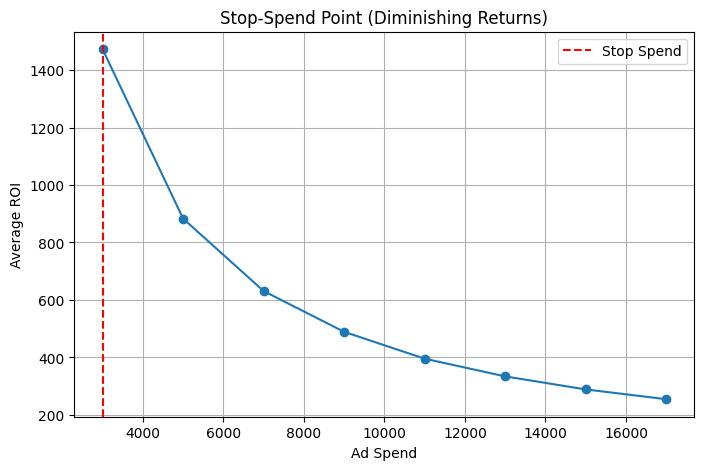

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(roi_curve["ad_spend"], roi_curve["roi"], marker="o")
plt.axvline(STOP_SPEND_AT, color="red", linestyle="--", label="Stop Spend")
plt.xlabel("Ad Spend")
plt.ylabel("Average ROI")
plt.title("Stop-Spend Point (Diminishing Returns)")
plt.legend()
plt.grid(True)
plt.show()


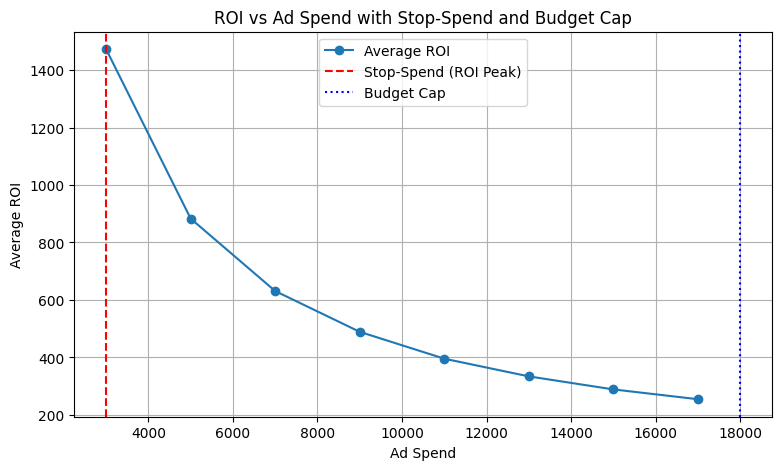

In [26]:
import matplotlib.pyplot as plt

BUDGET_CAP = 18000        # business constraint
STOP_SPEND_AT = optimal_point["ad_spend"]  # ROI peak

plt.figure(figsize=(9,5))

# ROI curve
plt.plot(
    roi_curve["ad_spend"],
    roi_curve["roi"],
    marker="o",
    label="Average ROI"
)

# Stop-spend line (ROI-based)
plt.axvline(
    STOP_SPEND_AT,
    color="red",
    linestyle="--",
    label="Stop-Spend (ROI Peak)"
)

# Budget cap line (business rule)
plt.axvline(
    BUDGET_CAP,
    color="blue",
    linestyle=":",
    label="Budget Cap"
)

plt.xlabel("Ad Spend")
plt.ylabel("Average ROI")
plt.title("ROI vs Ad Spend with Stop-Spend and Budget Cap")
plt.legend()
plt.grid(True)
plt.show()


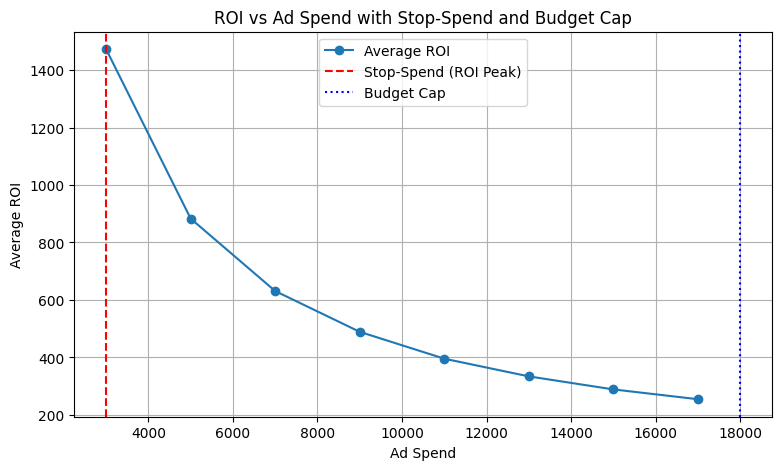

In [27]:
import matplotlib.pyplot as plt

BUDGET_CAP = 18000        # business constraint
STOP_SPEND_AT = optimal_point["ad_spend"]  # ROI peak

plt.figure(figsize=(9,5))

# ROI curve
plt.plot(
    roi_curve["ad_spend"],
    roi_curve["roi"],
    marker="o",
    label="Average ROI"
)

# Stop-spend line (ROI-based)
plt.axvline(
    STOP_SPEND_AT,
    color="red",
    linestyle="--",
    label="Stop-Spend (ROI Peak)"
)

# Budget cap line (business rule)
plt.axvline(
    BUDGET_CAP,
    color="blue",
    linestyle=":",
    label="Budget Cap"
)

plt.xlabel("Ad Spend")
plt.ylabel("Average ROI")
plt.title("ROI vs Ad Spend with Stop-Spend and Budget Cap")
plt.legend()
plt.grid(True)
plt.show()


In [28]:
# Find ad spend that maximizes profit
profit_curve = (
    what_if_df
    .groupby("ad_spend")["profit"]
    .mean()
    .reset_index()
    .sort_values("ad_spend")
)

optimal_budget_cap = profit_curve.loc[
    profit_curve["profit"].idxmax()
]

optimal_budget_cap


ad_spend    3.000000e+03
profit      4.417260e+06
Name: 0, dtype: float64

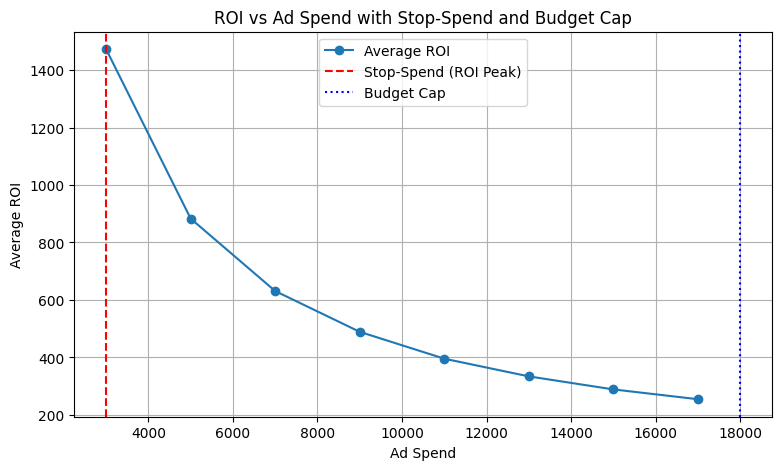

In [29]:
import matplotlib.pyplot as plt

BUDGET_CAP = 18000        # business constraint
STOP_SPEND_AT = optimal_point["ad_spend"]  # ROI peak

plt.figure(figsize=(9,5))

# ROI curve
plt.plot(
    roi_curve["ad_spend"],
    roi_curve["roi"],
    marker="o",
    label="Average ROI"
)

# Stop-spend line (ROI-based)
plt.axvline(
    STOP_SPEND_AT,
    color="red",
    linestyle="--",
    label="Stop-Spend (ROI Peak)"
)

# Budget cap line (business rule)
plt.axvline(
    BUDGET_CAP,
    color="blue",
    linestyle=":",
    label="Budget Cap"
)

plt.xlabel("Ad Spend")
plt.ylabel("Average ROI")
plt.title("ROI vs Ad Spend with Stop-Spend and Budget Cap")
plt.legend()
plt.grid(True)
plt.show()


In [30]:
profit_curve["marginal_profit"] = profit_curve["profit"].diff()

# Stop when marginal profit becomes small or negative
STOP_THRESHOLD = 5000   # business-defined

optimized_cap = profit_curve[
    profit_curve["marginal_profit"] >= STOP_THRESHOLD
]["ad_spend"].max()

optimized_cap


nan

In [31]:
profit_curve["marginal_profit"] = profit_curve["profit"].diff()

# Stop when marginal profit becomes small or negative
STOP_THRESHOLD = 5000   # business-defined

optimized_cap = profit_curve[
    profit_curve["marginal_profit"] >= STOP_THRESHOLD
]["ad_spend"].max()

optimized_cap


nan

In [32]:

nan

NameError: name 'nan' is not defined

In [33]:
what_if_df.head()
what_if_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ad_spend  12 non-null     int64  
 1   sales     12 non-null     float64
 2   revenue   12 non-null     float64
 3   profit    12 non-null     float64
 4   roi       12 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 612.0 bytes


In [34]:
fixed_budget_cap = what_if_df.loc[
    what_if_df["profit"].idxmax(), "ad_spend"
]

fixed_budget_cap


np.int64(3000)

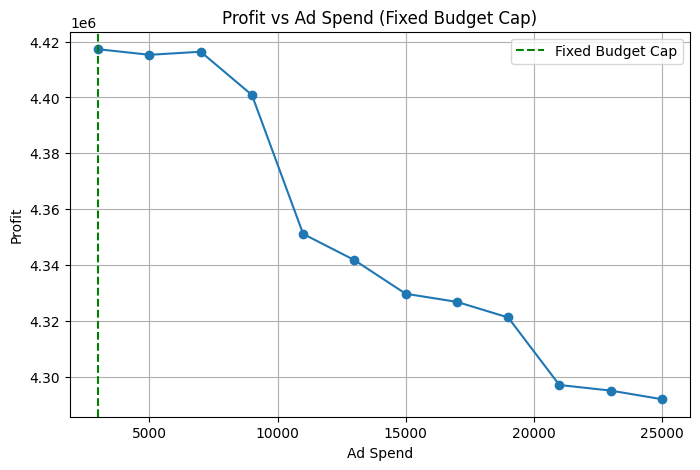

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(what_if_df["ad_spend"], what_if_df["profit"], marker="o")
plt.axvline(fixed_budget_cap, color="green", linestyle="--", label="Fixed Budget Cap")
plt.xlabel("Ad Spend")
plt.ylabel("Profit")
plt.title("Profit vs Ad Spend (Fixed Budget Cap)")
plt.legend()
plt.grid(True)
plt.show()


In [37]:
df = what_if_df.sort_values("ad_spend").reset_index(drop=True)
df


,ad_spend,sales,revenue,profit,roi
0,3000,1473.420081,4.420260e+06,4.417260e+06,1472.420081
1,5000,1473.420081,4.420260e+06,4.415260e+06,883.052049
2,7000,1474.452533,4.423358e+06,4.416358e+06,630.908228
3,9000,1469.955319,4.409866e+06,4.400866e+06,488.985106
4,11000,1454.034161,4.362102e+06,4.351102e+06,395.554771
5,13000,1451.575616,4.354727e+06,4.341727e+06,333.978988
6,15000,1448.227890,4.344684e+06,4.329684e+06,288.645578
7,17000,1447.923312,4.343770e+06,4.326770e+06,254.515879
8,19000,1446.729553,4.340189e+06,4.321189e+06,227.430982
9,21000,1439.333539,4.318001e+06,4.297001e+06,204.619077


In [38]:
df["marginal_profit"] = df["profit"].diff()
df


,ad_spend,sales,revenue,profit,roi,marginal_profit
0,3000,1473.420081,4.420260e+06,4.417260e+06,1472.420081,NaN
1,5000,1473.420081,4.420260e+06,4.415260e+06,883.052049,-2000.000000
2,7000,1474.452533,4.423358e+06,4.416358e+06,630.908228,1097.354167
3,9000,1469.955319,4.409866e+06,4.400866e+06,488.985106,-15491.641546
4,11000,1454.034161,4.362102e+06,4.351102e+06,395.554771,-49763.472454
5,13000,1451.575616,4.354727e+06,4.341727e+06,333.978988,-9375.637654
6,15000,1448.227890,4.344684e+06,4.329684e+06,288.645578,-12043.177995
7,17000,1447.923312,4.343770e+06,4.326770e+06,254.515879,-2913.732955
8,19000,1446.729553,4.340189e+06,4.321189e+06,227.430982,-5581.276515
9,21000,1439.333539,4.318001e+06,4.297001e+06,204.619077,-24188.041869


In [39]:
# find first point where marginal profit becomes negative
drop_index = df[df["marginal_profit"] < 0].index.min()
drop_index


np.int64(1)

In [40]:
if pd.isna(drop_index):
    stop_spend_cap = df.iloc[-1]["ad_spend"]  # profit never drops
else:
    stop_spend_cap = df.iloc[drop_index - 1]["ad_spend"]

stop_spend_cap


np.float64(3000.0)

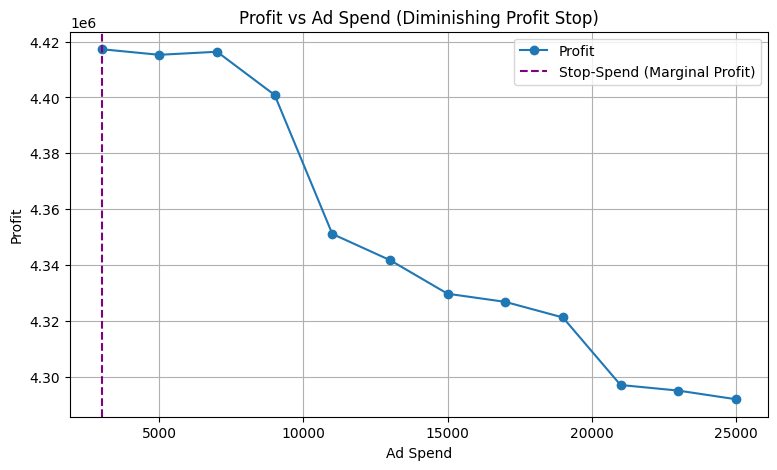

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
plt.plot(df["ad_spend"], df["profit"], marker="o", label="Profit")
plt.axvline(stop_spend_cap, color="purple", linestyle="--", label="Stop-Spend (Marginal Profit)")
plt.xlabel("Ad Spend")
plt.ylabel("Profit")
plt.title("Profit vs Ad Spend (Diminishing Profit Stop)")
plt.legend()
plt.grid(True)
plt.show()


In [42]:
df = what_if_df.sort_values("ad_spend").reset_index(drop=True)



In [43]:
max_profit = df["profit"].max()
max_profit


np.float64(4417260.244063017)

In [44]:
TOLERANCE = 0.05   # 5%
profit_threshold = max_profit * (1 - TOLERANCE)
profit_threshold


np.float64(4196397.231859866)

In [47]:
optimized_budget_cap = df[
    df["profit"] >= profit_threshold
]["ad_spend"].min()

optimized_budget_cap


np.int64(3000)

In [48]:
BUDGET_CAP = 18000


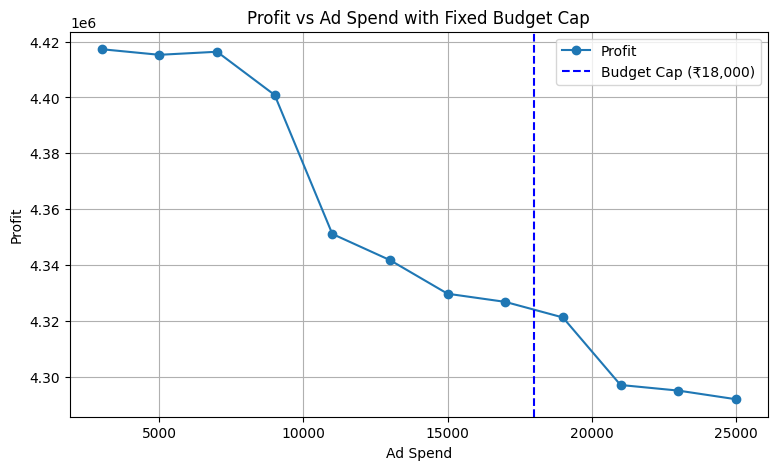

In [49]:
plt.figure(figsize=(9,5))
plt.plot(df["ad_spend"], df["profit"], marker="o", label="Profit")

plt.axvline(
    BUDGET_CAP,
    color="blue",
    linestyle="--",
    label="Budget Cap (₹18,000)"
)

plt.xlabel("Ad Spend")
plt.ylabel("Profit")
plt.title("Profit vs Ad Spend with Fixed Budget Cap")
plt.legend()
plt.grid(True)
plt.show()


In [50]:
PRICE = base_df["price"].values[0]

strategies = [
    {
        "name": "Aggressive Growth",
        "ad_spend": 18000,
        "discount": 10,
        "targeting_low": 0,
        "targeting_medium": 0  # HIGH targeting
    },
    {
        "name": "Balanced Growth",
        "ad_spend": 14000,
        "discount": 5,
        "targeting_low": 0,
        "targeting_medium": 1  # MEDIUM targeting
    },
    {
        "name": "Sustainable Growth",
        "ad_spend": 10000,
        "discount": 0,
        "targeting_low": 0,
        "targeting_medium": 0  # HIGH targeting
    }
]


In [51]:
results = []

for s in strategies:
    temp = base_df.copy()
    
    temp["ad_spend"] = s["ad_spend"]
    temp["discount"] = s["discount"]
    temp["targeting_low"] = s["targeting_low"]
    temp["targeting_medium"] = s["targeting_medium"]
    
    sales = model.predict(temp)[0]
    revenue = sales * PRICE
    profit = revenue - s["ad_spend"]
    roi = profit / s["ad_spend"]
    
    results.append([
        s["name"],
        s["ad_spend"],
        s["discount"],
        "High" if s["targeting_medium"] == 0 else "Medium",
        sales,
        profit,
        roi
    ])


In [52]:
strategy_df = pd.DataFrame(
    results,
    columns=[
        "Strategy",
        "Ad Spend",
        "Discount",
        "Targeting",
        "Predicted Sales",
        "Profit",
        "ROI"
    ]
)

strategy_df


,Strategy,Ad Spend,Discount,Targeting,Predicted Sales,Profit,ROI
0,Aggressive Growth,18000,10,High,1449.626906,4.330881e+06,240.604484
1,Balanced Growth,14000,5,Medium,1110.597318,3.317792e+06,236.985140
2,Sustainable Growth,10000,0,High,1449.333187,4.338000e+06,433.799956


In [53]:
strategy_df.loc[strategy_df["Profit"].idxmax()]


Strategy           Sustainable Growth
Ad Spend                        10000
Discount                            0
Targeting                        High
Predicted Sales           1449.333187
Profit                 4337999.559687
ROI                        433.799956
Name: 2, dtype: object

In [54]:
strategy_df.loc[strategy_df["ROI"].idxmax()]


Strategy           Sustainable Growth
Ad Spend                        10000
Discount                            0
Targeting                        High
Predicted Sales           1449.333187
Profit                 4337999.559687
ROI                        433.799956
Name: 2, dtype: object

In [56]:
def evaluate_growth_strategies(model, base_df):
    """
    Compares Aggressive, Balanced, and Sustainable growth strategies
    under a fixed budget using a trained ML model.
    """
    
    PRICE = base_df["price"].values[0]

    strategies = [
        {
            "name": "Aggressive Growth",
            "ad_spend": 18000,
            "discount": 10,
            "targeting_low": 0,
            "targeting_medium": 0   # HIGH targeting
        },
        {
            "name": "Balanced Growth",
            "ad_spend": 14000,
            "discount": 5,
            "targeting_low": 0,
            "targeting_medium": 1   # MEDIUM targeting
        },
        {
            "name": "Sustainable Growth",
            "ad_spend": 10000,
            "discount": 0,
            "targeting_low": 0,
            "targeting_medium": 0   # HIGH targeting
        }
    ]

    results = []

    for s in strategies:
        temp = base_df.copy()

        temp["ad_spend"] = s["ad_spend"]
        temp["discount"] = s["discount"]
        temp["targeting_low"] = s["targeting_low"]
        temp["targeting_medium"] = s["targeting_medium"]

        sales = model.predict(temp)[0]
        revenue = sales * PRICE
        profit = revenue - s["ad_spend"]
        roi = profit / s["ad_spend"]

        results.append({
            "Strategy": s["name"],
            "Ad Spend": s["ad_spend"],
            "Discount (%)": s["discount"],
            "Targeting": "High" if s["targeting_medium"] == 0 else "Medium",
            "Predicted Sales": round(sales, 2),
            "Profit": round(profit, 2),
            "ROI": round(roi, 2)
        })

    strategy_df = pd.DataFrame(results)

    return strategy_df


In [57]:
strategy_results = evaluate_growth_strategies(model, base_df)
strategy_results


,Strategy,Ad Spend,Discount (%),Targeting,Predicted Sales,Profit,ROI
0,Aggressive Growth,18000,10,High,1449.63,4330880.72,240.60
1,Balanced Growth,14000,5,Medium,1110.60,3317791.95,236.99
2,Sustainable Growth,10000,0,High,1449.33,4337999.56,433.80


In [58]:
best_profit = strategy_results.loc[
    strategy_results["Profit"].idxmax()
]

best_roi = strategy_results.loc[
    strategy_results["ROI"].idxmax()
]

best_profit, best_roi


(Strategy           Sustainable Growth
 Ad Spend                        10000
 Discount (%)                        0
 Targeting                        High
 Predicted Sales               1449.33
 Profit                     4337999.56
 ROI                             433.8
 Name: 2, dtype: object,
 Strategy           Sustainable Growth
 Ad Spend                        10000
 Discount (%)                        0
 Targeting                        High
 Predicted Sales               1449.33
 Profit                     4337999.56
 ROI                             433.8
 Name: 2, dtype: object)